# Importing libraries

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import Figure

In [7]:
data = pd.read_csv("D:\Datasets/candy_crush.csv")
# convert data into pandas dataframe.
df = pd.DataFrame(data)

In [9]:
# convert data type of date column to datetime
df['dt'] = pd.to_datetime(df['dt'])

In [11]:
#checking columns data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16865 entries, 0 to 16864
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   player_id     16865 non-null  object        
 1   dt            16865 non-null  datetime64[ns]
 2   level         16865 non-null  int64         
 3   num_attempts  16865 non-null  int64         
 4   num_success   16865 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 658.9+ KB


Text(0, 0.5, 'Number of players')

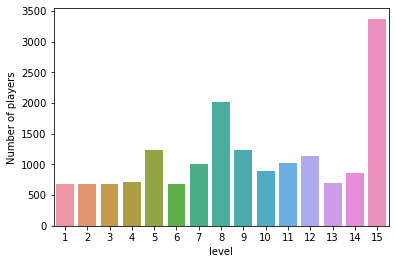

In [12]:
# Number of players that played on a particular level

num_player_per_level = df[['level','player_id']].groupby('level').count()
sns.barplot(data=num_player_per_level, x=num_player_per_level.index, y='player_id')
plt.ylabel('Number of players')


### Observation : There is a total of 15 levels in this dataset. Level 15 has an abnormally high player count.

# Data Manipulation using Pandas

In [14]:
# creating a new dataframe to show the number of attempts and successes on each level.
level_df = df[['level', 'num_attempts','num_success']].groupby('level').sum()

# winning players on each level (players that win atleast once on each level)
winners = df[['level','num_success']].groupby('level').apply(lambda x:(x>0).sum())
level_df['num_winners'] = winners['num_success']

# number of players with no success on each level
losers = df[['level','num_success']].groupby('level').apply(lambda x:(x==0).sum())
level_df['num_losers'] = losers['num_success']

# total number of players
level_df['num_players'] = level_df['num_winners']+level_df['num_losers']

# Average number of attempts to win a level: # attempts/ # success
level_df['attempts_success_ratio'] = level_df['num_attempts']/level_df['num_success']

# win rate on each level (lower value = more difficult)
win_rate = df.groupby(['level'])[['num_attempts','num_success']].agg('sum')
level_df['win_rate'] = (win_rate.num_success) / (win_rate.num_attempts)

# player_win_lose_ratio: # winning players/ total # players
level_df['player_win_lose_ratio'] = level_df['num_winners']/level_df['num_players']

In [27]:
level_df

,num_attempts,num_success,num_winners,num_losers,num_players,attempts_success_ratio,win_rate,player_win_lose_ratio
level,,,,,,,,
1,1322,818,641,37,678,1.616137,0.618759,0.945428
2,1285,666,631,50,681,1.929429,0.518288,0.926579
3,1546,662,620,56,676,2.335347,0.428202,0.917160
4,1893,705,646,61,707,2.685106,0.372425,0.913720
5,6937,634,596,635,1231,10.941640,0.091394,0.484159
6,1591,668,601,73,674,2.381737,0.419862,0.891691
7,4526,614,574,432,1006,7.371336,0.135661,0.570577
8,15816,641,609,1401,2010,24.673947,0.040529,0.302985
9,8241,670,629,613,1242,12.300000,0.081301,0.506441


# Visualising the data using matplotlib.pyplot and seaborn.

Text(0.5, 1.0, 'Winning players / total players')

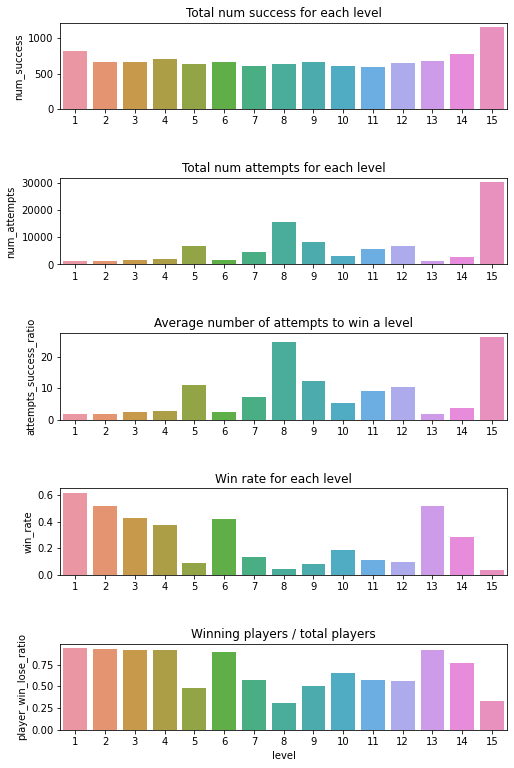

In [29]:
fig, ax = plt.subplots(5,1, figsize=(8,13), gridspec_kw={'hspace':.8})

plt.sca(ax[0])
sns.barplot(data=level_df, x=level_df.index, y='num_success')
plt.title("Total num success for each level")
plt.xlabel('')

plt.sca(ax[1])
sns.barplot(data=level_df, x=level_df.index, y='num_attempts')
plt.title("Total num attempts for each level")
plt.xlabel('')

plt.sca(ax[2])
sns.barplot(data=level_df, x=level_df.index, y='attempts_success_ratio')
plt.title("Average number of attempts to win a level")
plt.xlabel('')

plt.sca(ax[3])
sns.barplot(data=level_df, x=level_df.index, y='win_rate')
plt.title("Win rate for each level")
plt.xlabel('')

plt.sca(ax[4])
sns.barplot(data=level_df, x=level_df.index, y='player_win_lose_ratio')
plt.title("Winning players / total players")

### Observation : Exploratory Data Analysis (EDA)
<p> Levels 8 and 15 require on average over 20 attempts to achieve a win. Whilst every other level require no more than 10 attempts. <p>

<p>As expected, levels 8 and 15 have the low win rates with 0.04 and 0.03 respectively. Levels 5, 7, 9, 11, and 12 also have low win rates (around 0.1). However, the low win rate by itself does not necessarily indicate a high difficulty.


## Identifying correlations between success, attempts, win rate and number of players

<AxesSubplot:>

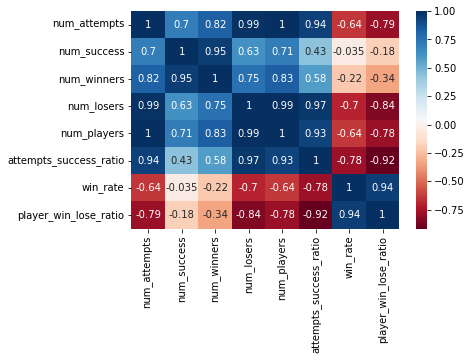

In [30]:
sns.heatmap(level_df.corr(),cmap='RdBu',annot=True)

### Observation: 
<p> As expected the attempts/success ratio, num_attempts are negatively correlated with player win/loss ratio. Generally the harder levels (low win/loss ratio) require more attempts to succeed. Number of successes is uncorrelated with win rate and player win/lose ratio.<p>

# Linear regression model

<AxesSubplot:xlabel='player_win_lose_ratio', ylabel='num_players'>

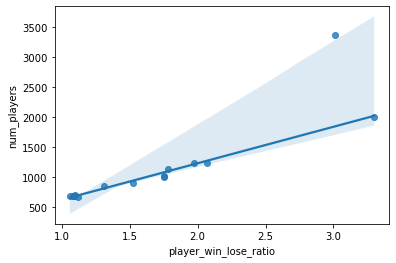

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
temp = level_df.sort_values(by='player_win_lose_ratio')
y = temp['num_players'].values.reshape(-1,1)
X = temp['player_win_lose_ratio'].values.reshape(-1,1)
sns.regplot(data=level_df, x=1/level_df['player_win_lose_ratio'], y='num_players',order=1,robust=True)

### Observation:
<p> There seems to be a linear correlation between win/lose ratio and number of players. We see that the hardest levels (level 8 and 15) have the most number of players.

Looking at the correlation graph, lvl 15 appears to be an outlier with 3374 players. One explanation for this is that when a player succeeds on a hard level, that player is more likely to share his/her score to friends, and as a result more players play this level.<p>

# Building profiles of player who play multiple levels

Text(0, 0.5, 'counts')

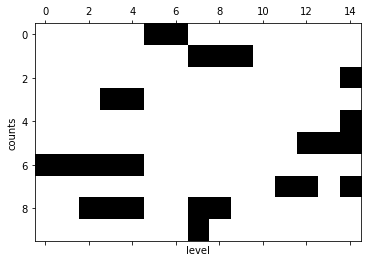

In [33]:
profile = df[['player_id','level','num_attempts']].pivot_table(index='player_id',columns='level',values='num_attempts',fill_value=False,aggfunc=(lambda x: np.sum(x)>0))
plt.spy(profile.values.astype(float)[:10,:])
plt.xlabel("level")
plt.ylabel("counts")

### Observation: 
<p>We can see that many players that played the higher levels did not play the lower levels. This could explain why there is a very low win rate for level 15 since most player who attempted this level did not practise on the easier level and thus, they are not well versed in the mechanics of the game.<p>